D:\Program Op\Anaconda\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in floor_divide
D:\Program Op\Anaconda\lib\site-packages\ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in floor_divide
D:\Program Op\Anaconda\lib\site-packages\ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in floor_divide
D:\Program Op\Anaconda\lib\site-packages\ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in floor_divide
D:\Program Op\Anaconda\lib\site-packages\ipykernel_launcher.py:275: RuntimeWarning: invalid value encountered in floor_divide
D:\Program Op\Anaconda\lib\site-packages\ipykernel_launcher.py:332: RuntimeWarning: invalid value encountered in floor_divide


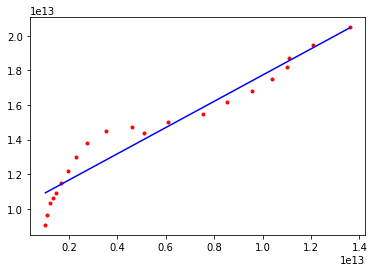

In [2]:
import pandas as pd
import numpy as np
import random
import os
import sys
import re
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from pyecharts import options as opts
from pyecharts.charts import Bar3D, Tab, Pie, Line, Map, Timeline, Kline
from pyecharts.components import Table
from itertools import chain
from pyecharts.globals import ThemeType



def timeline_map() -> Timeline:
    tl = Timeline(init_opts=opts.InitOpts(width="1525px", height="725px"))
    tl.add_schema(
        play_interval=1000,
        pos_left="200",
        pos_bottom="20",
        label_opts=opts.LabelOpts(is_show=True, color="black"),
    )
    
    gdp = pd.DataFrame(pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_422027.csv",header=3))
    givegdp = ['Country Name']

    for x in range(1978,2019):
        givegdp.append(str(x))
    
    locgdp = gdp.loc[:,givegdp]
    country = locgdp.loc[:,['Country Name']]
    country = list(chain.from_iterable(country.values))
    
    for y in range(1978, 2019):
        money = locgdp.loc[:,[str(y)]]
        values = list(chain.from_iterable(money.values//100000000))
        map0 = (
            Map()
            .add(
                "GDP", [list(z) for z in zip(country, values)], "world", zoom=1.5
            )
            .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                                      font_size=10))
                            
            .set_global_opts(
                legend_opts=opts.LegendOpts(
                orient="vertical", pos_top="15%", pos_left="2%", is_show=False),
                title_opts=opts.TitleOpts(title="{}年世界各国经济总量（GDP）".format(y),
                title_textstyle_opts=opts.TextStyleOpts(font_size=25, color="black")),
                
                visualmap_opts=opts.VisualMapOpts(
                    is_calculable=True,
                    dimension=0,
                    pos_left="100",
                    pos_top="500",
                    range_text=["单位亿美元", ""],
                    range_color=["lightskyblue", "yellow", "orangered"],
                    textstyle_opts=opts.TextStyleOpts(color="black"),
                    max_=150000, min_=1)
            )
        )
        tl.add(map0, "{}年".format(y))
    return tl



def bar3d_base() -> Bar3D:
    gdp = pd.DataFrame(pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_422027.csv",header=3))
    givegdp = ['Country Name']
    years = []
    database = []

    for x in range(1978,2019):
        givegdp.append(str(x))
    
    locgdp = gdp.loc[:,givegdp]
    country = locgdp.loc[:,['Country Name']]
    country = list(chain.from_iterable(country.values))

    for j in range (1978,2019):
        years.append(j)
    
    for y in range(1978, 2019):
        money = locgdp.loc[:,[str(y)]]
        values = list(chain.from_iterable(money.values//100000000))
        data = [list(z) for z in zip(country, values)]
        for i in range(0,len(data)):
            data[i].append(y - 1978)
            data[i][0] = i
        
        database.append(data)
    data = np.reshape(database,(-1,3))
    data = [[d[0], d[2], d[1]] for d in data]
    
    #数据太多了，画不过来 = =
    c=(
        Bar3D(init_opts=opts.InitOpts(width="1525px", height="725px"))
        .add(
            series_name="坐标值/Coordinate",
            data=data,
            xaxis3d_opts=opts.Axis3DOpts(type_="category", data=country, name="Country", name_gap = 30),
            yaxis3d_opts=opts.Axis3DOpts(type_="category", data=years, name="Years", name_gap = 30),
            zaxis3d_opts=opts.Axis3DOpts(type_="value", name="GDP", name_gap = 30, max_=210000),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="1978 - 2012年世界各国经济总量柱状图",
            title_textstyle_opts=opts.TextStyleOpts(font_size=25, color="black")),
            visualmap_opts=opts.VisualMapOpts(
                max_=150000,
                min_=1,
                pos_left="100",
                pos_top="center",
                range_text=["单位亿美元", ""],
                textstyle_opts=opts.TextStyleOpts(color="black"),
                range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026"]
            )
        )
    )
    return c



def line_base() -> Line:
    gdp = pd.DataFrame(pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_422027.csv",header=3))
    givegdp = ['Country Name']
    giveyears = []
    years = []
    database = []
    datasize = []

    for x in range(1978,2019):
        givegdp.append(str(x))
        giveyears.append(str(x))
    
    locgdp = gdp.loc[:,givegdp]
    price = gdp.loc[:,giveyears]
    country = locgdp.loc[:,['Country Name']]
    for i in range(1,21):
        price0 = list(chain.from_iterable(price[i-1:i].values//100000000))
        datasize.append(price0)
    
    country = list(chain.from_iterable(country.values))
    country20 = country[0:10]

    
    
    c = (
        Line(init_opts=opts.InitOpts(width="1525px", height="725px", theme=ThemeType.DARK))
        .add_xaxis(giveyears)
        .add_yaxis(country20[0], datasize[0], symbol_size=10)
        .add_yaxis(country20[1], datasize[1], symbol_size=10)
        .add_yaxis(country20[2], datasize[2], symbol_size=10)
        .add_yaxis(country20[3], datasize[3], symbol_size=10)
        .add_yaxis(country20[4], datasize[4], symbol_size=10)
        .add_yaxis(country20[5], datasize[5], symbol_size=10)
        .add_yaxis(country20[6], datasize[6], symbol_size=10)
        .add_yaxis(country20[7], datasize[7], symbol_size=10)
        .add_yaxis(country20[8], datasize[8], symbol_size=10)
        .add_yaxis(country20[9], datasize[9], symbol_size=10)
        .set_series_opts(
            label_opts=opts.LabelOpts(is_show=False)
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="1978 - 2018年GDP前10国折线统计图",
                        title_textstyle_opts=opts.TextStyleOpts(color="white")))
    )
    return c



def bar3d_base0() -> Bar3D:
    gdp = pd.DataFrame(pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_422027.csv",header=3))
    givegdp = ['Country Name']
    years = []
    database = []

    for x in range(1978,2019):
        givegdp.append(str(x))
    
    locgdp = gdp.loc[:,givegdp]
    country = locgdp.loc[:,['Country Name']]
    country = list(chain.from_iterable(country.values))

    for j in range (1998,2019):
        years.append(j)
    
    for y in range(1998, 2019):
        money = locgdp.loc[:,[str(y)]]
        values = list(chain.from_iterable(money.values//100000000))
        data = [list(z) for z in zip(country[0:20], values[0:20])]
        for i in range(0,len(data)):
            data[i].append(y - 1998)
            data[i][0] = i
        
        database.append(data)
    data = np.reshape(database,(-1,3))
    data = [[d[0], d[2], d[1]] for d in data]
    

    c=(
        Bar3D(init_opts=opts.InitOpts(width="1525px", height="725px"))
        .add(
            series_name="坐标值/Coordinate",
            data=data,
            xaxis3d_opts=opts.Axis3DOpts(type_="category", data=country[0:20], name="Country", name_gap = 30),
            yaxis3d_opts=opts.Axis3DOpts(type_="category", data=years, name="Years", name_gap = 30),
            zaxis3d_opts=opts.Axis3DOpts(type_="value", name="GDP", name_gap = 30, max_=210000),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="1998 - 2018年世界经济总量前10柱状图",
            title_textstyle_opts=opts.TextStyleOpts(font_size=25, color="black")),
            visualmap_opts=opts.VisualMapOpts(
                max_=150000,
                min_=1,
                pos_left="100",
                pos_top="center",
                range_text=["单位亿美元", ""],
                textstyle_opts=opts.TextStyleOpts(color="black"),
                range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026"]
            )
        )
    )
    return c



def timeline_pie() -> Timeline:
    tl = Timeline(init_opts=opts.InitOpts(width="1525px", height="725px", theme=ThemeType.DARK))
    tl.add_schema(
        orient="vertical",
        play_interval=1000,
        pos_left="null",
        pos_right="100",
        pos_top="20",
        pos_bottom="20",
        width="60",
        label_opts=opts.LabelOpts(is_show=True, color="white"),
    )
    
    gdp = pd.DataFrame(pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_422027.csv",header=3))
    givegdp = ['Country Name']

    for x in range(1978,2019):
        givegdp.append(str(x))
    
    locgdp = gdp.loc[:,givegdp]
    country = locgdp.loc[:,['Country Name']]
    country = list(chain.from_iterable(country.values))
    
    for y in range(1978, 2019):
        money = locgdp.loc[:,[str(y)]]
        values = list(chain.from_iterable(money.values//100000000))
        pie0 = (
            Pie()
            .add(
                "GDP", [list(z) for z in zip(country, values)],
                radius=["30%", "55%"],
            )
            .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                                      font_size=10))
                            
            .set_global_opts(
                legend_opts=opts.LegendOpts(
                orient="vertical", pos_top="15%", pos_left="2%", is_show=False),
                title_opts=opts.TitleOpts(title="{}年世界各国经济总量（GDP）".format(y),
                title_textstyle_opts=opts.TextStyleOpts(font_size=25, color="white")),
                
                visualmap_opts=opts.VisualMapOpts(
                    is_calculable=True,
                    dimension=0,
                    pos_left="100",
                    pos_top="center",
                    range_text=["单位亿美元", ""],
                    range_color=["lightskyblue", "yellow", "orangered"],
                    #textstyle_opts=opts.TextStyleOpts(color="white"),
                    max_=150000, min_=1)
            )
        )
        tl.add(pie0, "{}年".format(y))
    return tl



def timeline_pie0() -> Timeline:
    tl = Timeline(init_opts=opts.InitOpts(width="1525px", height="725px", theme=ThemeType.DARK))
    tl.add_schema(
        orient="vertical",
        play_interval=1000,
        pos_left="null",
        pos_right="100",
        pos_top="20",
        pos_bottom="20",
        width="60",
        label_opts=opts.LabelOpts(is_show=True, color="white"),
    )
    
    gdp = pd.DataFrame(pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_422027.csv",header=3))
    givegdp = ['Country Name']

    for x in range(1978,2019):
        givegdp.append(str(x))
    
    locgdp = gdp.loc[:,givegdp]
    country = locgdp.loc[:,['Country Name']]
    country = list(chain.from_iterable(country.values))
    
    for y in range(1978, 2019):
        money = locgdp.loc[:,[str(y)]]
        values = list(chain.from_iterable(money.values//100000000))
        pie0 = (
            Pie()
            .add(
                "GDP", [list(z) for z in zip(country[0:20], values[0:20])],
                radius=["30%", "55%"],
            )
            .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                                      font_size=10))
                            
            .set_global_opts(
                legend_opts=opts.LegendOpts(
                orient="vertical", pos_top="15%", pos_left="2%", is_show=False),
                title_opts=opts.TitleOpts(title="{}年世界各国经济总量（GDP）".format(y),
                title_textstyle_opts=opts.TextStyleOpts(font_size=25, color="white")),
                
                visualmap_opts=opts.VisualMapOpts(
                    is_calculable=True,
                    dimension=0,
                    pos_left="100",
                    pos_top="center",
                    range_text=["单位亿美元", ""],
                    range_color=["lightskyblue", "yellow", "orangered"],
                    #textstyle_opts=opts.TextStyleOpts(color="white"),
                    max_=150000, min_=1)
            )
        )
        tl.add(pie0, "{}年".format(y))
    return tl



def kline_datazoom_slider() -> Kline:
    year = 2018
    CHINA = 136000
    USA = 205000
    ratechi = 0.066
    rateusa = 0.029
    week = 0
    line = 0
    data1 = []
    data = []

    for i in range(20):
        year = year + 1
        line = (random.randint(-10,10))/100
        if 0 != i and 0 == i % 4:
            ratechi -= 0.005
            rateusa -= 0.002
            if 0 != i and 0 == i % 10:
                week = (random.randint(-10,10))/100
                ratechi = ratechi + week
                rateusa = rateusa + week
        CHINA = CHINA * (ratechi + 1)
        CHINA_top = CHINA * (line + 1)
        USA = USA * (rateusa + 1)
        USA_top = USA * (line + 1)
        data1.append(USA)
        data1.append(CHINA)
        data1.append(CHINA_top)
        data1.append(USA_top)
    data = np.reshape(data1,(20,4))
    data = [[d[0],d[1],d[2],d[3]] for d in data]
    
    
    
    c = (
        Kline(init_opts=opts.InitOpts(width="1525px", height="725px"))
        .add_xaxis(["{}".format(2019 + i) for i in range(20)])
        .add_yaxis("超越色", data)
        .set_global_opts(
            xaxis_opts=opts.AxisOpts(is_scale=True),
            yaxis_opts=opts.AxisOpts(
                is_scale=True,
                splitarea_opts=opts.SplitAreaOpts(
                    is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
                ),
            ),
            datazoom_opts=[opts.DataZoomOpts()],
            title_opts=opts.TitleOpts(title="中美20年内经济总量预测"),
        )
    )
    return c



def line_back():
    gdp = pd.DataFrame(pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_422027.csv",header=3))
    givegdp = ['Country Name']
    years = []
    database = []

    for x in range(1998,2019):
        givegdp.append(str(x))
        years.append(str(x))
    
    locgdp = gdp.loc[:,years]
    USAdata = locgdp[0:1]
    CHINAdata = locgdp[1:2]

    CHINA_train = CHINAdata[:10]
    USA_train = USAdata[:10]
    CHINA_test = CHINAdata[-10:]
    USA_test = USAdata[-10:]

    model = LinearRegression()
    CHINA_train_x = np.array(CHINA_train.values).reshape(-1,1)
    USA_train_y = np.array(USA_train.values).reshape(-1,1)
    model.fit(CHINA_train_x,USA_train_y)

    CHINA_test_x = np.array(CHINA_test.values).reshape(-1,1)

    x = np.array(CHINAdata.values).reshape(-1,1)
    y = np.array(USAdata.values).reshape(-1,1)
    plt.plot(x,y,'r.')
    plt.plot(x,model.predict(x),'b-')

    
    
tab = Tab()
tab.add(timeline_map(), "Map")
tab.add(bar3d_base(), "Bar-World")
tab.add(line_base(), "Line")
tab.add(bar3d_base0(), "Bar-20th")
tab.add(timeline_pie(), "Pie-World")
tab.add(timeline_pie0(), "Pie-20th")
tab.add(kline_datazoom_slider(), "China VS USA")
tab.render()

line_back()